# Data Exploration - DBSCAN
Where are defected boilers geographically clustered and how does that compare to where inspections/boilers are clustered?

In [59]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.cluster import DBSCAN
import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [60]:
# dbn = pd.read_csv('data/dbncats_ppacs.csv')
dbn = pd.read_csv('data/all_boilder_year_data_w_ACS.csv',
                 usecols=['bin_number', 'defects_exist', 'xcoord', 'ycoord'])
print(dbn.shape)
dbn.head()

(1632518, 4)


,bin_number,defects_exist,xcoord,ycoord
0,1080776,0,988184.0,210527.0
1,1080776,0,988184.0,210527.0
2,1080776,0,988184.0,210527.0
3,1080776,0,988184.0,210527.0
4,1080776,0,988184.0,210527.0


In [61]:
dbn.dropna(axis=0, inplace=True)

In [5]:
defects = dbn[dbn.defects_exist == 1]
defects_coords = defects.iloc[:,2:]
dbn_coords = dbn.iloc[:,2:]

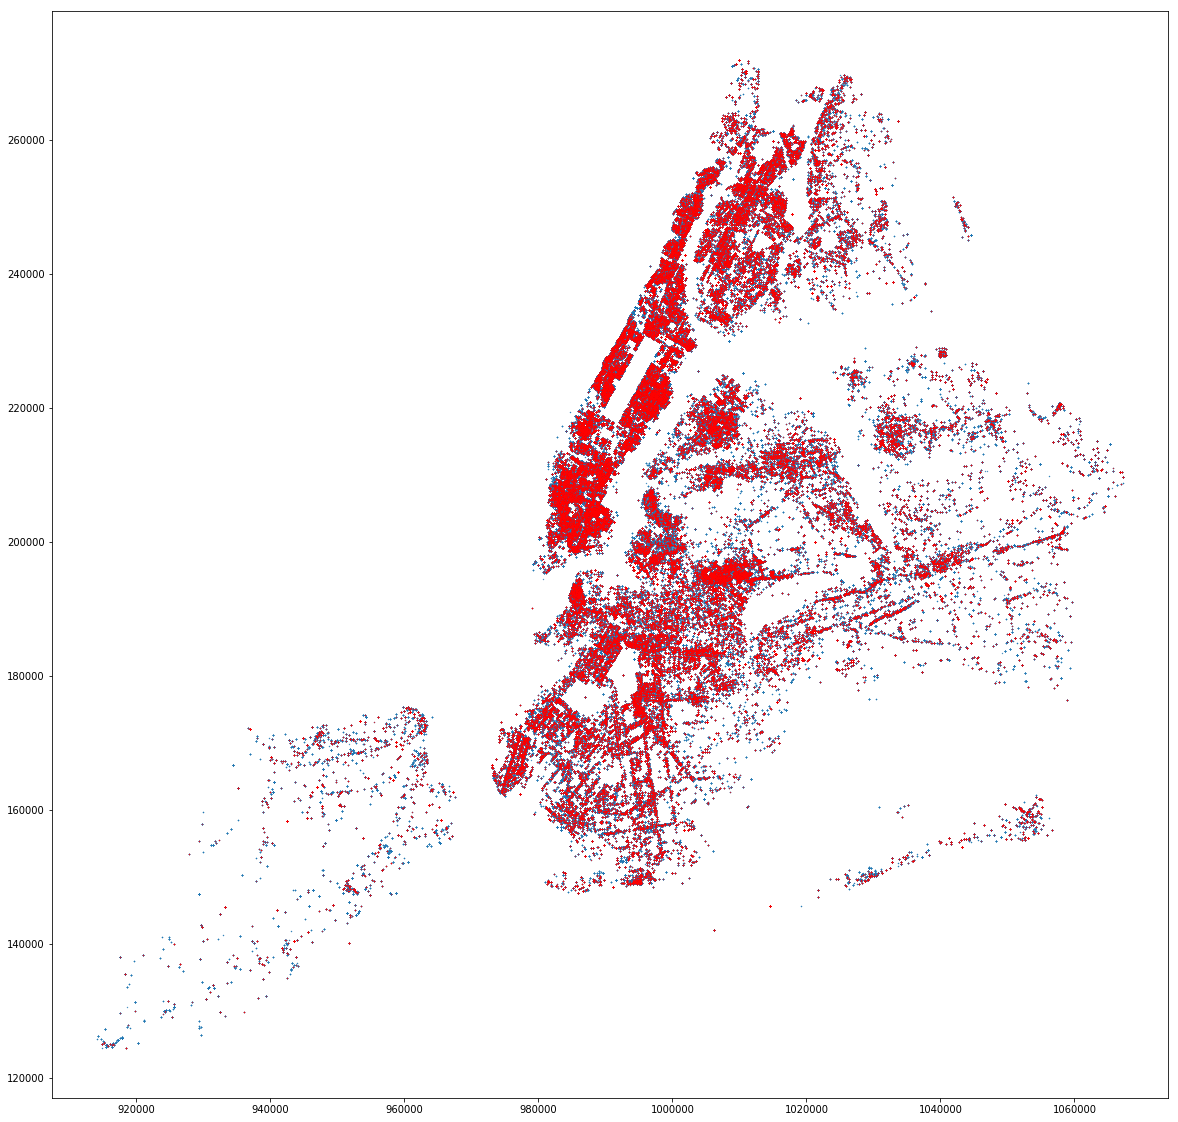

In [6]:
# plot of all inspections and defects
plt.figure(figsize=(20,20))
plt.scatter(dbn.xcoord, dbn.ycoord, s=0.05, zorder=0)
plt.scatter(defects.xcoord, defects.ycoord, color='r', s=0.1, zorder=1)
plt.axis('equal')
plt.show()

### DBSCAN with defects

In [7]:
start = datetime.datetime.now()
start2 = datetime.datetime.now()
print(start)

precision_list = []
recall_list = []
eps_list = []
min_samples_list = []
num_points = []

total_num_samples = len(defects_coords.iloc[:,0])
max_eps = max(np.max(defects_coords.iloc[:,0])-np.min(defects_coords.iloc[:,0]),
              np.max(defects_coords.iloc[:,1])-np.min(defects_coords.iloc[:,1]))

for eps in np.logspace(np.log10(max_eps)-5,np.log10(max_eps),10)[:-4]:
# for eps in np.linspace(0.01,0.1,10):
    end = datetime.datetime.now()
    print(eps, (end-start2).total_seconds())
    start2 = datetime.datetime.now()
    for min_samples in np.linspace(10,100,10,endpoint=True):
        db = DBSCAN(eps, min_samples).fit(defects_coords)
        num_clustered = len(db.labels_[db.labels_ >= 0])
        if (num_clustered > 0) & (num_clustered < 0.1*total_num_samples):  
            num_correct_clustered = len(db.labels_[0:100][db.labels_[0:100] >= 0])
            precision_list.append(num_correct_clustered/num_clustered)
            recall_list.append(1.0*num_correct_clustered/100.0)
            eps_list.append(eps)
            min_samples_list.append(min_samples)
            num_points.append(len(db.labels_[db.labels_ >= 0]))

end = datetime.datetime.now()
print((end-start).total_seconds())


2019-05-09 19:51:10.818567
1.52325 0.005156
5.47427666339 11.866041
19.6735302723 11.903801
70.703001908 12.069972
254.093414329 12.821585
913.164384298 17.130899
108.739396


In [20]:
ind = [i for i, val in enumerate(precision_list) if val == max(precision_list)]
i = ind[np.array([num_points[i] for i in ind]).argmax()]

eps, min_sample = eps_list[i], min_samples_list[i]
eps, min_sample

(1.5232500000000004, 50.0)

eps = 1.52325 , min_samples = 50.0 , num_detected_points = 2241
precision= 0.024542614904060688 recall= 0.55


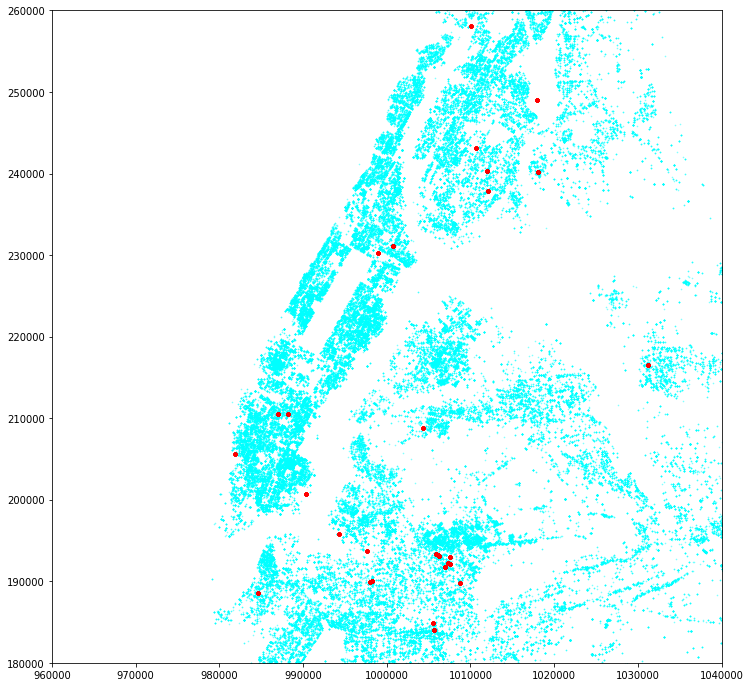

In [69]:
db = DBSCAN(5, min_sample).fit(defects_coords)
num_clustered = len(db.labels_[db.labels_ >= 0])
plt.figure(figsize=(12,12))
plt.xlim(960000,1040000)
plt.ylim(180000,260000)
print ("eps =", eps, ", min_samples =", min_sample, ", num_detected_points =", len(db.labels_[db.labels_ >= 0]))      
# evaluation
num_correct_clustered = len(db.labels_[0:100][db.labels_[0:100] >= 0])
print ("precision=",1.0*num_correct_clustered/num_clustered,"recall=",1.0*num_correct_clustered/100.0)
defects_coords['label'] = db.labels_
# plt.scatter(defects_coords.iloc[:,0],defects_coords.iloc[:,1],c=db.labels_,s=5,cmap=plt.cm.cool)
plt.scatter(defects_coords[defects_coords.label == -1].iloc[:,0],defects_coords[defects_coords.label == -1].iloc[:,1],c='cyan',s=0.5, alpha=0.4, zorder=-1)
plt.scatter(defects_coords[defects_coords.label != -1].iloc[:,0],defects_coords[defects_coords.label != -1].iloc[:,1],c='red',s=6, zorder=1)
plt.show()

In [51]:
labels = pd.Series(db.labels_)
len(labels[labels != -1]), len(labels[labels == -1])

(38056, 1594201)

eps = 1.52325 , min_samples = 50.0 , num_detected_points = 38056


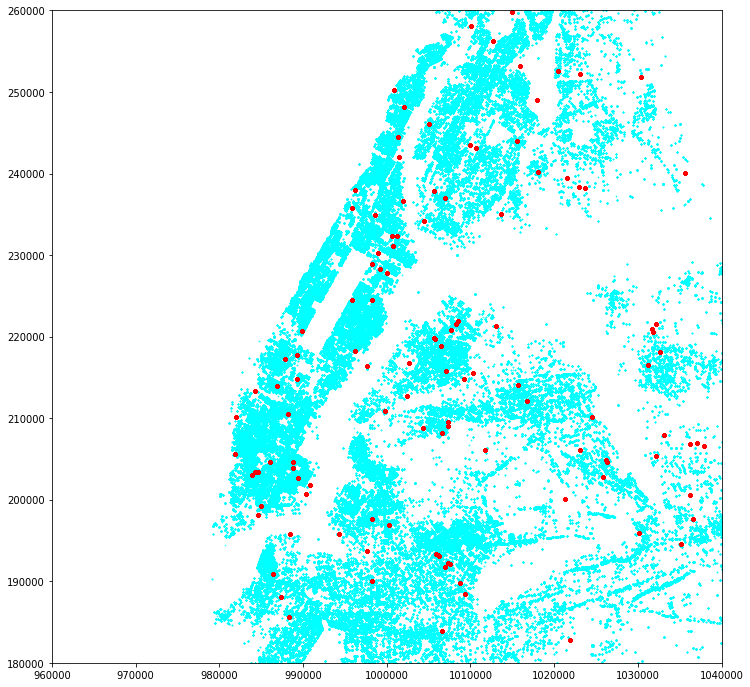

In [68]:
db = DBSCAN(eps, min_sample*2.5).fit(dbn_coords)
plt.figure(figsize=(12,12))
plt.xlim(960000,1040000)
plt.ylim(180000,260000)
print ("eps =", eps, ", min_samples =", min_sample, ", num_detected_points =", len(db.labels_[db.labels_ >= 0])) 
dbn_coords['label'] = db.labels_
# plt.scatter(dbn_coords.iloc[:,0],dbn_coords.iloc[:,1],c=db.labels_,s=5,cmap=plt.cm.cool)
plt.scatter(dbn_coords[dbn_coords.label == -1].iloc[:,0],dbn_coords[dbn_coords.label == -1].iloc[:,1],c='cyan',s=0.5, alpha=0.4, zorder=-1)
plt.scatter(dbn_coords[dbn_coords.label != -1].iloc[:,0],dbn_coords[dbn_coords.label != -1].iloc[:,1],c='red',s=6, zorder=1)
plt.show()

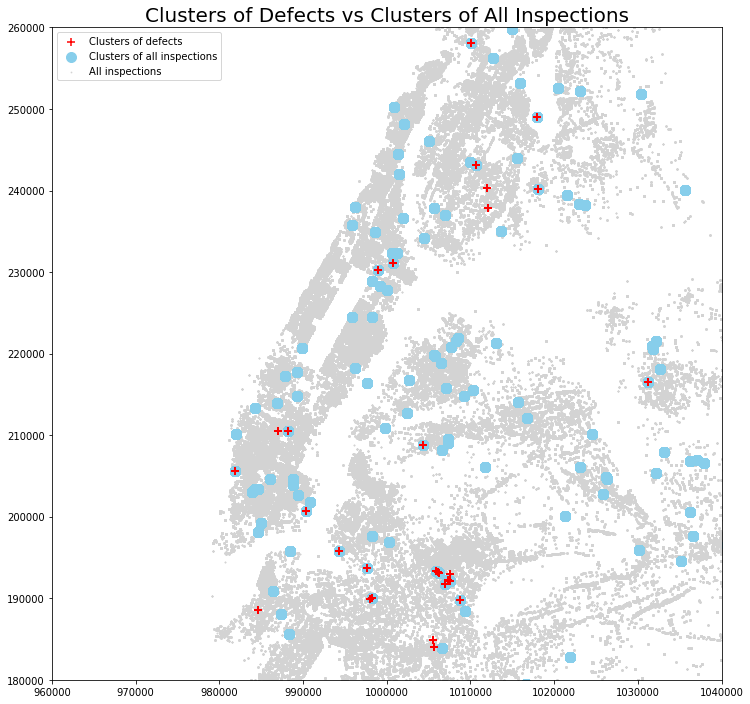

In [78]:
plt.figure(figsize=(12,12))
plt.title('Clusters of Defects vs Clusters of All Inspections', fontsize=20)
plt.xlim(960000,1040000)
plt.ylim(180000,260000)
plt.scatter(defects_coords[defects_coords.label != -1].iloc[:,0],defects_coords[defects_coords.label != -1].iloc[:,1], 
            marker='+', c='red', s=60, zorder=1, label='Clusters of defects')            
plt.scatter(dbn_coords[dbn_coords.label != -1].iloc[:,0],dbn_coords[dbn_coords.label != -1].iloc[:,1], 
            marker='o', c='skyblue',s=100, zorder=0, label='Clusters of all inspections')
plt.scatter(dbn_coords[dbn_coords.label == -1].iloc[:,0],dbn_coords[dbn_coords.label == -1].iloc[:,1],
            c='lightgrey',s=0.5, zorder=-1, label='All inspections')
plt.legend()
plt.show()
